<center><h1>3-2 선형 회귀</h1></center>

<h3> 사전 준비 </h3>

1. 데이터 리스트
    - http://bit.ly/perch_data
    

2. 사용할 ML 패키지 : 사이킷 런 설치<br>
pip install scikit-learn<br>

3. 선형 회귀(Leaner Regression) 이란?<br>

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)
# 훈련세트와 테스트세트를 2차원 배열로 나눕니다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

# 최근접 이웃 개수를 3으로 하는 모델을 훈련
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

# 길이가 50인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


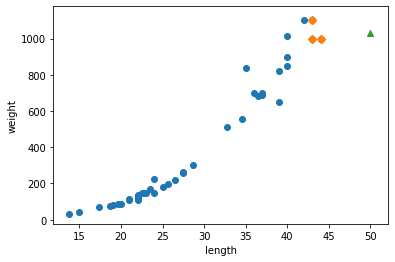

In [5]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
# 훈련 세트중 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
# 50 cm 농어 데이터
plt.scatter(50,1033,marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 이웃 샘플들의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


<h3>선형 회귀</h3>
널리 사용되는 대표적인 회귀 알고리즘 입니다. 선형이라는 말에서 짐작할 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘 입니다<br>

In [9]:
# 사이킷런은 sklearn.linear_model 패키지 아래에 Linear Regression 클래스가 있음
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련합니다
lr.fit(train_input,train_target)

#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
# ax+b =y a와 b는 lr 객체에 coef_ 와 intercept_ 속성에 저장
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


4. 모델 파라미터(model parameter)? coef_ 와 intercept_ 을 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부릅니다. 모델 파라미터를 찾는 것을 모델 기반 학습이라고 부릅니다. k-최근접 이웃에는 모델 파라미터가 없습니다. 이를 사례 기반 학습이라고 부릅니다

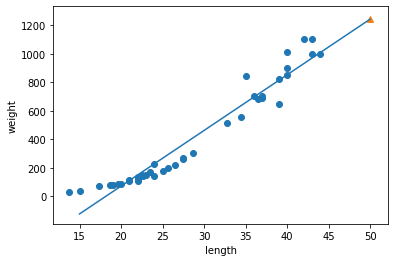

In [11]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지의 1차 방정식 그래프
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
#R2 확인
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976041
0.8247503123313558


<h3>다항 회귀</h3>

In [14]:
# 위의 산점도는 왼쪽 위로 구부러진 곡선에 가까움, 2차 방정식의 그래프를 그리려면 제곱한 항이 훈련세트에 추가되어야 함
# numpy에 column_stack()을 사용하면 두 배열을 나란히 붙여줌
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [17]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


5. 다항 회귀(polynomial regression)? 다항식을 이용한 선형 회귀를 다항 회귀라 부릅니다.

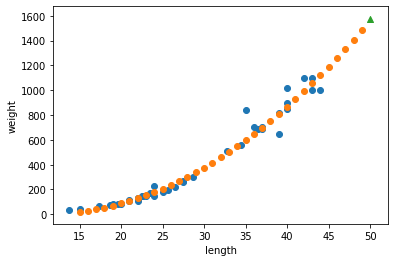

In [18]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수의 배열을 만듭니다.
point = np.arange(15,50)

# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식의 그래프를 그립니다
plt.scatter(point, 1.01*point**2 - 21.6*point + 116.05)
# 50 cm 농어 데이터
plt.scatter(50, 1574, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
